In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql import SparkSession
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [26]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/BigData/Credit_Data.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [27]:
df.shape

(400, 12)

#DATA PREPROCESSING

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         400 non-null    int64  
 1   Income     400 non-null    float64
 2   Limit      400 non-null    int64  
 3   Rating     400 non-null    int64  
 4   Cards      400 non-null    int64  
 5   Age        400 non-null    int64  
 6   Education  400 non-null    int64  
 7   Gender     400 non-null    object 
 8   Student    400 non-null    object 
 9   Married    400 non-null    object 
 10  Ethnicity  400 non-null    object 
 11  Balance    400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [29]:
df.isnull().sum()

,0
ID,0
Income,0
Limit,0
Rating,0
Cards,0
Age,0
Education,0
Gender,0
Student,0
Married,0


In [30]:
df.describe()

,ID,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [31]:
print(df['Ethnicity'].unique())

['Caucasian' 'Asian' 'African American']


In [44]:
# Correct way to select multiple columns and change their data type
columns_to_convert = ['Gender', 'Student', 'Married', 'Ethnicity']

# Use replace instead of astype to handle categorical values
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Student'] = df['Student'].replace({'Yes': 1, 'No': 0})
df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})
df['Ethnicity'] = df['Ethnicity'].replace({'Caucasian': 2, 'Asian': 1, 'African American': 0})

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         400 non-null    int64  
 1   Income     400 non-null    float64
 2   Limit      400 non-null    int64  
 3   Rating     400 non-null    int64  
 4   Cards      400 non-null    int64  
 5   Age        400 non-null    int64  
 6   Education  400 non-null    int64  
 7   Gender     400 non-null    int64  
 8   Student    400 non-null    int64  
 9   Married    400 non-null    int64  
 10  Ethnicity  400 non-null    int64  
 11  Balance    400 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,1,0,1,2,333
1,2,106.025,6645,483,3,82,15,0,1,1,1,903
2,3,104.593,7075,514,4,71,11,1,0,0,1,580
3,4,148.924,9504,681,3,36,11,0,0,0,1,964
4,5,55.882,4897,357,2,68,16,1,0,1,2,331


#EXPLORATORY DATA ANALYSIS

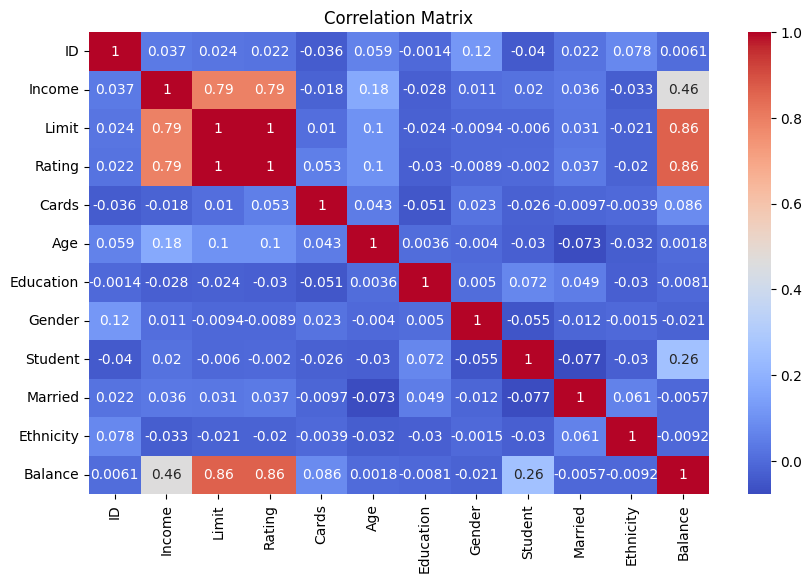

Balance      1.000000
Rating       0.863625
Limit        0.861697
Income       0.463656
Student      0.259018
Cards        0.086456
ID           0.006064
Age          0.001835
Married     -0.005673
Education   -0.008062
Ethnicity   -0.009157
Gender      -0.021474
Name: Balance, dtype: float64


In [33]:
# Korelasi antara fitur numerik dan Balance
correlation_matrix = df.corr()
correlation_with_balance = correlation_matrix['Balance'].sort_values(ascending=False)

# Visualisasi korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

print(correlation_with_balance)

#SELEKSI FITUR

In [34]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

X = df.drop('Balance', axis=1)  # Features
y = df['Balance']  # Target variable

# Model untuk evaluasi
model = RandomForestRegressor()
model.fit(X, y)

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

Rating       0.477492
Limit        0.369166
Income       0.077705
Student      0.052747
Age          0.007122
ID           0.006399
Education    0.002967
Cards        0.002385
Ethnicity    0.001785
Married      0.001411
Gender       0.000822
dtype: float64


In [35]:
# Seleksi fitur penting
selected_features = ['Rating', 'Limit', 'Income', 'Student']
X_selected = X[selected_features]

#MODELING

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [37]:
rf_regressor = RandomForestRegressor(n_estimators=100)

In [38]:
rf_regressor.fit(X_train,y_train)

RandomForestRegressor()

#EVALUASI MODEL

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inisialisasi model
model = RandomForestRegressor(random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 64.16475
Mean Squared Error (MSE): 9147.676500000001
R-squared (R2): 0.945247624195443


In [40]:
from sklearn.model_selection import GridSearchCV

# Parameter yang akan di-tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [41]:
best_model = RandomForestRegressor(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

best_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_best = best_model.predict(X_test)

# Evaluasi performa
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mean Absolute Error (Best Model): {mae_best}")
print(f"Mean Squared Error (Best Model): {mse_best}")
print(f"R-squared (Best Model): {r2_best}")

Mean Absolute Error (Best Model): 63.9670625
Mean Squared Error (Best Model): 9116.155020312499
R-squared (Best Model): 0.9454362924219337


In [42]:
# Perbandingan
print(f"MAE Improvement: {mae - mae_best:.2f}")
print(f"MSE Improvement: {mse - mse_best:.2f}")
print(f"R² Improvement: {r2_best - r2:.4f}")

MAE Improvement: 0.20
MSE Improvement: 31.52
R² Improvement: 0.0002


In [46]:
# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred_best)
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best)

# Tampilkan matriks evaluasi
evaluation_matrix = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [mae, mse, rmse, r2]
}

import pandas as pd
evaluation_df = pd.DataFrame(evaluation_matrix)

print("Evaluation Matrix:")
print(evaluation_df)

Evaluation Matrix:
      Metric        Value
0        MAE    63.967062
1        MSE  9116.155020
2       RMSE    95.478558
3  R-squared     0.945436


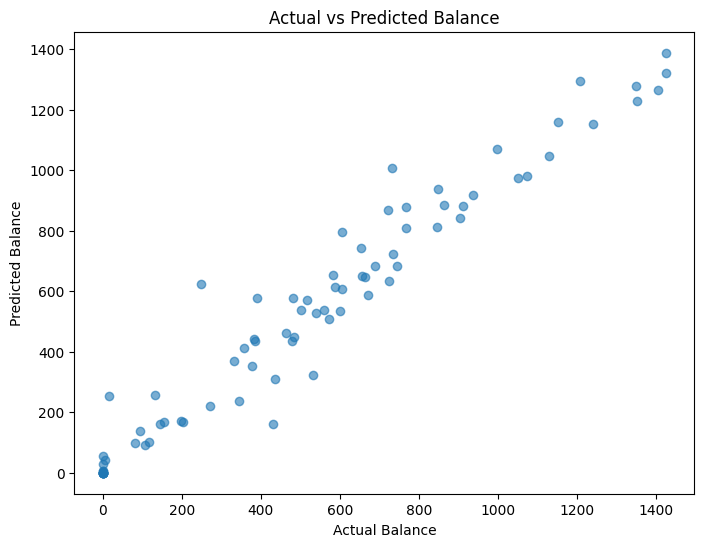

In [43]:
# Scatter plot antara nilai sebenarnya dan prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Balance")
plt.ylabel("Predicted Balance")
plt.title("Actual vs Predicted Balance")
plt.show()